# **Object Classification**
---

### _Loading the dataset_

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [7]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

Reshaping the labels because as every numpy related project, it was in a 2D array for no reason

In [8]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )

Naming classes

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Normalizing the data (or scalling it)
could be done by 2 ways:
- scaling it with sklearn's standard scaler
- using the fact that each value is known to be from 0 to 255 and deviding by that to scale it down between 0 & 1

we chose the latter

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

constructing the CNN with what looks like an unhealthy amount of weights to calculate

_*thinking of re-installing cuda now*_

In [13]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # i have a wide screen, deal with it
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

Training time (using gpu and all)

In [16]:
model.fit(X_train, y_train, epochs=15, validation_data=[X_test, y_test], shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8994 - accuracy: 0.6831 - val_loss: 0.9264 - val_accuracy: 0.6808
Epoch 2/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8684 - accuracy: 0.6940 - val_loss: 0.9280 - val_accuracy: 0.6820
Epoch 3/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8398 - accuracy: 0.7061 - val_loss: 0.8973 - val_accuracy: 0.6934
Epoch 4/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8089 - accuracy: 0.7160 - val_loss: 0.8865 - val_accuracy: 0.6904 -
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7801 - accuracy: 0.7253 - val_loss: 0.9012 - val_accuracy: 0.6891
Epoch 6/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7622 - accuracy: 0.7318 - val_loss: 0.9032 - val_accuracy: 0.6896
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7374 - accuracy: 0.7399 - val_loss: 0.8738 - val_accurac

#### _Predict a value_
Visualize it first

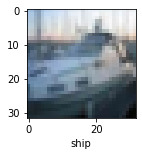

In [17]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_test, y_test, 2)

Finally predicting

In [19]:
import numpy as np
outputY = model.predict(X_test[:5])
y_classes = [np.argmax(element) for element in outputY]
print(y_test[:5])
print(y_classes)

[3 8 8 0 6]
[3, 1, 8, 0, 6]
